In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
mortgage=pd.read_csv('data/mortgage_covenant_data.csv')
mortgage

,activity_year,census_tract,derived_race,action_taken,loan_amount,property_value,income,interest_rate,tract_minority_population_percent,tract_to_msa_income_percentage,denial_reason-1,covenant_count,was_approved,covenant_density
0,2023,2.703706e+10,Race Not Available,6,185000.0,195000.0,NaN,6.125,40.37,73.48,10,0.0,False,NaN
1,2023,2.714103e+10,Race Not Available,6,375000.0,385000.0,NaN,6.625,10.64,121.26,10,0.0,False,NaN
2,2023,2.702395e+10,Race Not Available,6,105000.0,105000.0,NaN,6.125,8.92,90.13,10,0.0,False,NaN
3,2023,2.717110e+10,Race Not Available,6,285000.0,285000.0,NaN,6.750,13.27,104.37,10,0.0,False,NaN
4,2023,2.715948e+10,Race Not Available,6,175000.0,175000.0,NaN,6.875,5.87,82.22,10,0.0,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100926,2023,2.700902e+10,Race Not Available,6,255000.0,265000.0,NaN,6.125,4.88,106.18,10,0.0,False,NaN
100927,2023,2.706778e+10,Race Not Available,6,185000.0,335000.0,NaN,6.125,46.58,74.68,10,0.0,False,NaN
100928,2023,2.714948e+10,Race Not Available,6,65000.0,75000.0,NaN,6.750,20.14,118.83,10,0.0,False,NaN
100929,2023,2.705913e+10,Race Not Available,6,545000.0,525000.0,NaN,5.000,6.84,90.07,10,0.0,False,NaN


### Data Preprocessing

In [3]:
mortgage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100931 entries, 0 to 100930
Data columns (total 14 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   activity_year                      100931 non-null  int64  
 1   census_tract                       99915 non-null   float64
 2   derived_race                       100931 non-null  object 
 3   action_taken                       100931 non-null  int64  
 4   loan_amount                        100931 non-null  float64
 5   property_value                     83491 non-null   float64
 6   income                             88200 non-null   float64
 7   interest_rate                      78125 non-null   float64
 8   tract_minority_population_percent  100931 non-null  float64
 9   tract_to_msa_income_percentage     100931 non-null  float64
 10  denial_reason-1                    100931 non-null  int64  
 11  covenant_count                     1009

In [4]:
mortgage=mortgage.dropna()

In [5]:
mortgage['covenant_density']

322             Low (1-50)
363        Medium (51-100)
369       Very High (>200)
373        Medium (51-100)
403         High (101-200)
                ...       
100329          Low (1-50)
100339          Low (1-50)
100345      High (101-200)
100347    Very High (>200)
100922          Low (1-50)
Name: covenant_density, Length: 7732, dtype: object

In [6]:
def density(d):
  if d['covenant_density']=='Medium (51-100)':
    return 1
  elif d['covenant_density']=='High (101-200)':
    return 2
  elif d['covenant_density']=='Very High (>200)':
    return 3
  else:
    return 0    
    
mortgage['covenant_density'] = mortgage.apply(density, axis = 1)

/var/folders/lg/0gpljwbj5gl1ltsgvg516hzm0000gn/T/ipykernel_6412/378527793.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mortgage['covenant_density'] = mortgage.apply(density, axis = 1)


In [7]:
def approval(a):
    if a['was_approved']=='True':
        return 1
    else:
        return 0
mortgage['was_approved']=mortgage.apply(approval, axis=1)    

/var/folders/lg/0gpljwbj5gl1ltsgvg516hzm0000gn/T/ipykernel_6412/684252057.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mortgage['was_approved']=mortgage.apply(approval, axis=1)


In [8]:
dummy_race=pd.get_dummies(mortgage['derived_race'],drop_first=False, prefix='race', dtype='int')
mortgage= pd.concat([mortgage, dummy_race], axis=1)

In [9]:
mortgage

,activity_year,census_tract,derived_race,action_taken,loan_amount,property_value,income,interest_rate,tract_minority_population_percent,tract_to_msa_income_percentage,...,was_approved,covenant_density,race_2 or more minority races,race_American Indian or Alaska Native,race_Asian,race_Black or African American,race_Joint,race_Native Hawaiian or Other Pacific Islander,race_Race Not Available,race_White
322,2023,2.705303e+10,Race Not Available,1,325000.0,345000.0,82.0,6.625,42.72,80.87,...,0,0,0,0,0,0,0,0,1,0
363,2023,2.705302e+10,White,1,315000.0,325000.0,68.0,6.375,62.20,69.94,...,0,1,0,0,0,0,0,0,0,1
369,2023,2.705303e+10,Asian,1,365000.0,495000.0,392.0,7.625,12.92,108.89,...,0,3,0,0,1,0,0,0,0,0
373,2023,2.705303e+10,White,1,195000.0,225000.0,53.0,6.875,47.47,77.17,...,0,1,0,0,0,0,0,0,0,1
403,2023,2.705303e+10,White,1,475000.0,685000.0,221.0,7.250,25.75,106.27,...,0,2,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100329,2023,2.705311e+10,White,1,195000.0,235000.0,66.0,6.375,32.81,98.37,...,0,0,0,0,0,0,0,0,0,1
100339,2023,2.705311e+10,White,1,185000.0,325000.0,212.0,5.125,19.30,187.69,...,0,0,0,0,0,0,0,0,0,1
100345,2023,2.705302e+10,White,1,1375000.0,1715000.0,550.0,5.875,16.75,132.00,...,0,2,0,0,0,0,0,0,0,1
100347,2023,2.705302e+10,White,1,345000.0,365000.0,137.0,6.000,33.47,69.12,...,0,3,0,0,0,0,0,0,0,1


In [10]:
#things to do: lasso to find what factors attribute to ism, double bar to compare cov vs non cov, bar to compare
# cov density to prop value

### Lasso Regression to Determine Factor That Attribute to Discrimination

In [11]:
from sklearn.model_selection import train_test_split

X= mortgage.drop(['derived_race', 'activity_year'], axis=1)
y =mortgage['property_value']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=6500)

In [12]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import cross_val_score

from numpy import arange
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold

from sklearn.metrics import mean_squared_error

In [13]:
lasso = Lasso(alpha = 0.1, fit_intercept =True)
lasso.fit(X_train,y_train)

Lasso(alpha=0.1)

In [14]:
lasso_pred_on_test = lasso.predict(X_test)
lasso_mse = mean_squared_error(y_test,lasso_pred_on_test)
print(lasso_mse)

0.035565865636605576


In [15]:
lasso.score(X_train,y_train)

0.9999999999998134

In [16]:
lasso.score(X_test,y_test)

0.9999999999997415

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

In [18]:
lasso_s = Lasso(alpha=0.1, fit_intercept=True)
lasso_s.fit(X_train_scaled, y_train)

lasso_s_pred_on_test = lasso_s.predict(X_test_scaled)
lasso_s_mse = mean_squared_error(y_test,lasso_s_pred_on_test)
print(lasso_s_mse)

6176.491999599957


In [19]:
print(lasso_s.score(X_train_scaled,y_train))

0.9999999683147867


In [20]:
print(lasso_s.score(X_test_scaled,y_test))

0.9999999551226635


In [21]:
from sklearn.pipeline import Pipeline

lasso_model = Pipeline([ ('scaler',StandardScaler()), ('Lasso', Lasso(fit_intercept=True))  ])
cv_method = RepeatedKFold(n_splits=10, n_repeats=5, random_state=6500)
pipe_params = {'Lasso__alpha': 10**np.linspace(-8,0,9)}
search = GridSearchCV(lasso_model, pipe_params, scoring='neg_mean_squared_error',
                     cv=cv_method, n_jobs=-1, verbose=False)
search_results = search.fit(X_train,y_train)

In [22]:
search_results.cv_results_

{'mean_fit_time': array([0.00779379, 0.00651441, 0.00716323, 0.00749815, 0.00725279,
        0.00800883, 0.0069357 , 0.00737929, 0.00611997]),
 'std_fit_time': array([0.00273422, 0.00174476, 0.00275602, 0.00294294, 0.0029629 ,
        0.00258942, 0.00221645, 0.00226454, 0.00161969]),
 'mean_score_time': array([0.00109711, 0.00078218, 0.00094388, 0.00097646, 0.00087859,
        0.00098667, 0.00097477, 0.00099585, 0.00065045]),
 'std_score_time': array([0.00076898, 0.0003721 , 0.00072023, 0.00056662, 0.00058581,
        0.00054046, 0.00078929, 0.00052641, 0.00013195]),
 'param_Lasso__alpha': masked_array(data=[1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1,
                    1.0],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'params': [{'Lasso__alpha': 1e-08},
  {'Lasso__alpha': 1e-07},
  {'Lasso__alpha': 1e-06},
  {'Lasso__alpha': 1e-05},
  {'Lasso__alpha': 0.0001},
  

In [23]:
print('The best parameter %s' %search_results.best_params_ )
print('Best Value for Scoring Method: %.5f' % search_results.best_score_)

The best parameter {'Lasso__alpha': 1.0}
Best Value for Scoring Method: -6007.29949


In [24]:
search_results.cv_results_['mean_test_score']

array([-6152.62953817, -6152.62951858, -6152.62932264, -6152.62736347,
       -6152.60777186, -6152.41189166, -6150.431903  , -6131.39972099,
       -6007.29948953])

<Axes: >

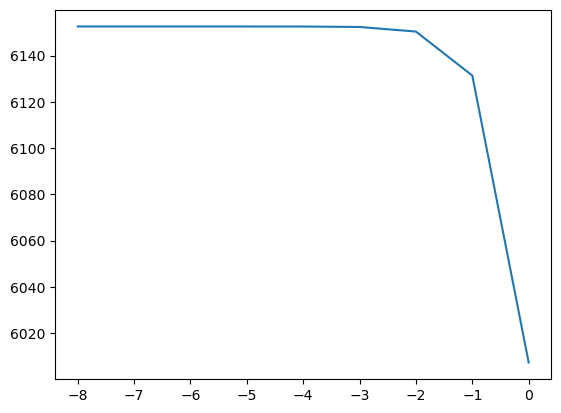

In [25]:
sns.lineplot(x=np.log10(pipe_params['Lasso__alpha']), y=-search_results.cv_results_['mean_test_score'])

In [26]:
lasso_mincv= min(-search_results.cv_results_['mean_test_score'])
lasso_mincv

6007.299489534178

In [27]:
search_results.best_params_

{'Lasso__alpha': 1.0}

In [28]:
alpha_opt = search_results.best_params_['Lasso__alpha']
lasso_opt = Pipeline([ ('scaler',StandardScaler()), ('Lasso', Lasso(alpha=alpha_opt,fit_intercept=True))  ])
lasso_opt.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('Lasso', Lasso())])

In [29]:
lasso_opt_pred_on_test = lasso_opt.predict(X_test)
lasso_opt_mse = mean_squared_error(y_test,lasso_opt_pred_on_test)
print(lasso_opt_mse)

6000.341353053443


In [30]:
lasso_opt_R2_test = lasso_opt.score(X_test,y_test)
lasso_opt_R2_test

0.999999956402544

In [31]:
lasso_opt.named_steps['Lasso'].coef_

array([ 0.00000000e+00, -4.10724264e+00,  1.89752030e+02,  4.17110696e+05,
       -1.24796000e+01, -1.01741264e+01, -0.00000000e+00, -4.87954289e+00,
        0.00000000e+00,  4.68930785e-01,  0.00000000e+00, -3.33796035e+00,
       -0.00000000e+00,  9.15899726e-02, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  8.03200235e-01, -0.00000000e+00])

In [32]:
lasso.coef_

array([ 9.16298163e-09, -0.00000000e+00,  1.57404193e-06,  9.99999081e-01,
       -1.49669719e-04, -0.00000000e+00, -0.00000000e+00, -3.60498903e-04,
        0.00000000e+00, -2.47141121e-05,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00])

In [33]:
df_lasso = pd.DataFrame(lasso.coef_)

In [34]:
names = pd.DataFrame(list(X.columns))
df_lasso = pd.concat([names, df_lasso], axis = 1)
df_lasso.head()

,0,0
0,census_tract,9.162982e-09
1,action_taken,-0.000000e+00
2,loan_amount,1.574042e-06
3,property_value,9.999991e-01
4,income,-1.496697e-04


In [35]:
df_lasso.columns = ['Feature', 'lasso_coeff_.1']
df_lasso = df_lasso.sort_values(by='lasso_coeff_.1', ascending = False)
df_lasso

,Feature,lasso_coeff_.1
3,property_value,9.999991e-01
2,loan_amount,1.574042e-06
0,census_tract,9.162982e-09
11,covenant_density,-0.000000e+00
18,race_Race Not Available,0.000000e+00
17,race_Native Hawaiian or Other Pacific Islander,0.000000e+00
16,race_Joint,-0.000000e+00
15,race_Black or African American,0.000000e+00
14,race_Asian,-0.000000e+00
13,race_American Indian or Alaska Native,0.000000e+00


In [36]:
## census tract and loan amounts has something to do with housing discrimination

### Data Visualizations Comparing Variables

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Race Not Available'),
  Text(1, 0, 'White'),
  Text(2, 0, 'Asian'),
  Text(3, 0, 'Joint'),
  Text(4, 0, 'Black or African American'),
  Text(5, 0, 'American Indian or Alaska Native'),
  Text(6, 0, '2 or more minority races'),
  Text(7, 0, 'Native Hawaiian or Other Pacific Islander')])

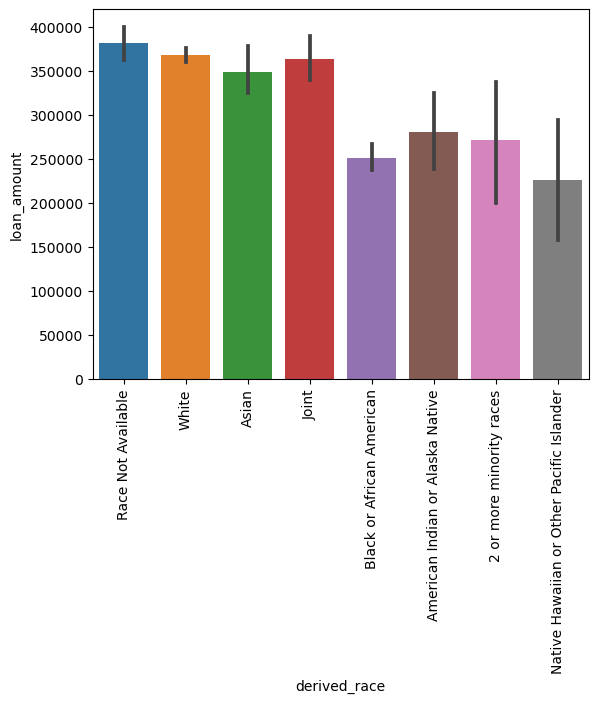

In [37]:
fig1=sns.barplot(mortgage, x='derived_race', y='loan_amount')
plt.xticks(rotation=90)

In [38]:
## Black/African Americans are take out the least amount of loans.

(0.0, 1000.0)

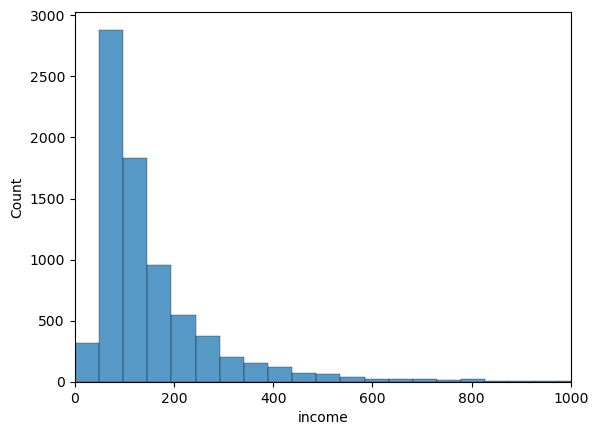

In [39]:
fig2=sns.histplot(mortgage, x='income', bins=150)
plt.xlim(0,1000)

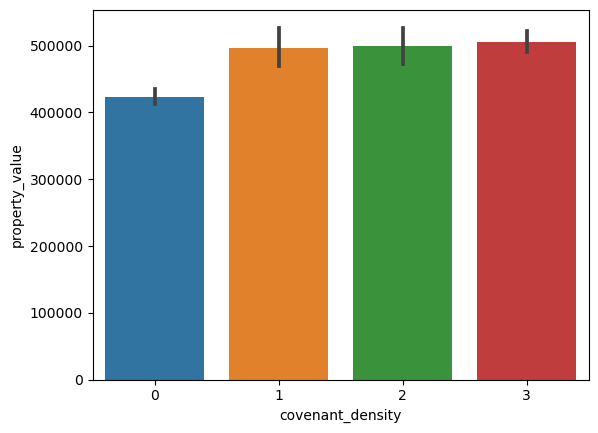

In [47]:
fig3=sns.barplot(mortgage, x='covenant_density', y='property_value')

In [48]:
## Places with lower covenant densities have lower property values. On the other hand, places with medium to
## high covenant densities have similar property values.

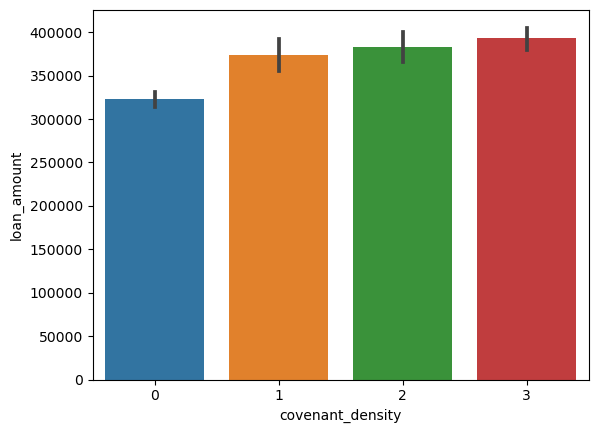

In [45]:
fig4=sns.barplot(mortgage, x='covenant_density', y='loan_amount')

In [46]:
## Places with lower covenant densities have lower loan amounts.